In [1]:
import pandas as pd
from iertools.read import read_sql, read_epw
from dateutil.parser import parse
import matplotlib.pyplot as plt

# Linkage 1 to 2, thermal zone to outdoor

In [2]:
# epw = read_epw("../epw/epw_rh23_24_ws05CST.epw",alias=True,year=2006)
# f1 = parse("2006-01-04 07:00")
# f2 = f1 + pd.Timedelta("48H")

# fig, ax = plt.subplots(figsize=(12,2),sharex=True)

# ax.plot(epw.P)

# ax.set_xlim(f1,f2)

In [3]:
f = "../idf/evap_one_zone/one_zone.sql"
tmp = read_sql(f)
nombres = {
    'Environment:Site Outdoor Air Drybulb Temperature (C)': 'To',
    'Environment:Site Outdoor Air Relative Humidity (%)': 'hr',
    'Environment:Site Wind Speed (m/s)': 'ws',
    'Environment:Site Wind Direction (deg)': 'wd',
    'CAFE:Zone Mean Air Temperature (C)': 'Ti',
    'CAFE:Zone Air Relative Humidity (%)':'hr_cafe',
    'VESTE:AFN Linkage Node 1 to Node 2 Volume Flow Rate (m3/s)': 'Veste_out',
    'VESTE:AFN Linkage Node 2 to Node 1 Volume Flow Rate (m3/s)': 'Veste_in',
    'VOESTE:AFN Linkage Node 1 to Node 2 Volume Flow Rate (m3/s)': 'Voeste_out',
    'VOESTE:AFN Linkage Node 2 to Node 1 Volume Flow Rate (m3/s)': 'Voeste_in',
    'VESTE:AFN Linkage Node 1 to Node 2 Mass Flow Rate (kg/s)': 'Meste_out',
    'VESTE:AFN Linkage Node 2 to Node 1 Mass Flow Rate (kg/s)': 'Meste_in',
    'VOESTE:AFN Linkage Node 1 to Node 2 Mass Flow Rate (kg/s)':'MOeste_out',
    'VOESTE:AFN Linkage Node 2 to Node 1 Mass Flow Rate (kg/s)':'MOeste_in',
    'CAFE_HVAC:Zone Ideal Loads Supply Air Total Heating Energy (J)':"Eheating",
    "CAFE_HVAC:Zone Ideal Loads Supply Air Total Cooling Energy (J)":"Ecooling"
}

tmp.rename(columns=nombres)
data = tmp.data
# data

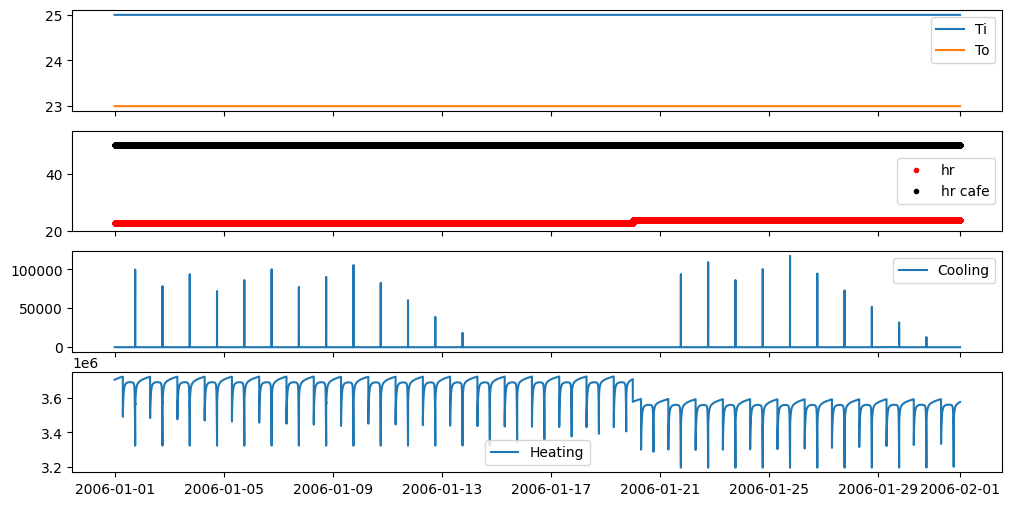

In [4]:
f1 = parse("2006-01-01 06:00")
f2 = f1 + pd.Timedelta("13H")

fig, ax = plt.subplots(4,figsize=(12,6),sharex=True)

ax[0].plot(data.Ti,label="Ti")
ax[0].plot(data.To,label="To")

ax[1].plot(data.hr,'r.',label="hr")
ax[1].plot(data.hr_cafe,'k.',label="hr cafe")
ax[1].set_ylim(20,55)

ax[2].plot(data.Ecooling,label="Cooling")
ax[3].plot(data.Eheating,label="Heating")

for a in ax:
    a.legend()
#     a.set_xlim(f1,f2)

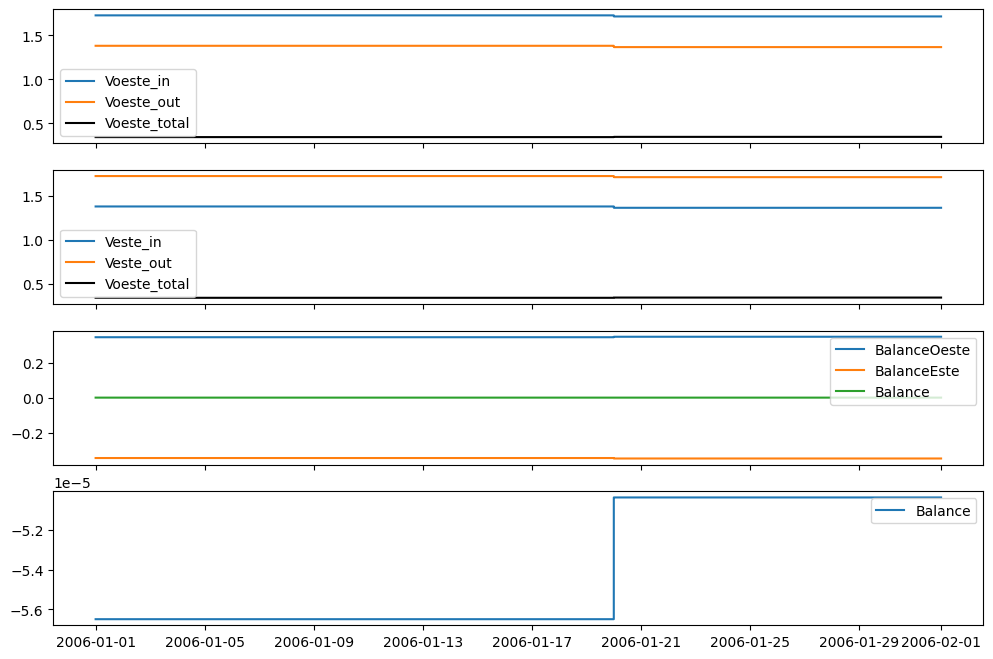

In [5]:
fig, ax = plt.subplots(4,figsize=(12,8),sharex=True)


ax[0].plot(data.Voeste_in,label="Voeste_in")
ax[0].plot(data.Voeste_out,label="Voeste_out")
ax[0].plot(data.Voeste_in - data.Voeste_out,"k-",label="Voeste_total")

ax[1].plot(data.Veste_in,label="Veste_in")
ax[1].plot(data.Veste_out,label="Veste_out")
ax[1].plot(data.Voeste_in - data.Voeste_out,"k-",label="Voeste_total")

balanceOeste = data.Voeste_in - data.Voeste_out
balanceEste  = data.Veste_in  - data.Veste_out

ax[2].plot(balanceOeste,label='BalanceOeste')
ax[2].plot(balanceEste,label='BalanceEste')
ax[2].plot(balanceOeste + balanceEste,label="Balance")

ax[3].plot(balanceOeste + balanceEste,label="Balance")



for a in ax:
    a.legend()
#     a.set_xlim(f1,f2)
